In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
data=pd.read_excel('Contraceptive_method.xlsx')

In [4]:
data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [6]:
data.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [7]:
data.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [8]:
cols = ['Wife_age','No_of_children_born']

for column in cols:
    print(column)
    median_1 = data[column].mode()[0]
    print(median_1)
    data[column].fillna(value=median_1,inplace=True)
    
data.isnull().sum()

Wife_age
25.0
No_of_children_born
2.0


Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1473.0,32.239647,8.235759,16.0,25.0,31.0,38.0,49.0
No_of_children_born,1473.0,3.236253,2.352985,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [10]:
data.duplicated().sum()

87

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

# Univariate Analysis

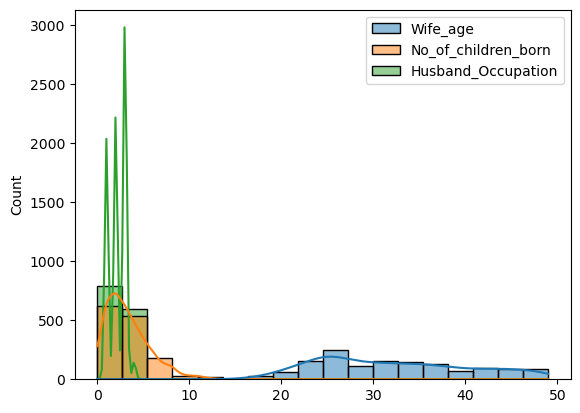

In [13]:
sns.histplot(data=data, kde=True);

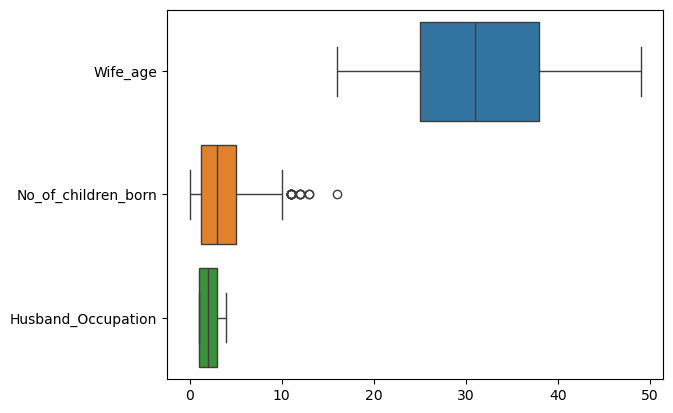

In [16]:
sns.boxplot(data=data, orient='h');

Wife_age
Skew: 0.34
No_of_children_born
Skew: 1.11
Husband_Occupation
Skew: -0.15


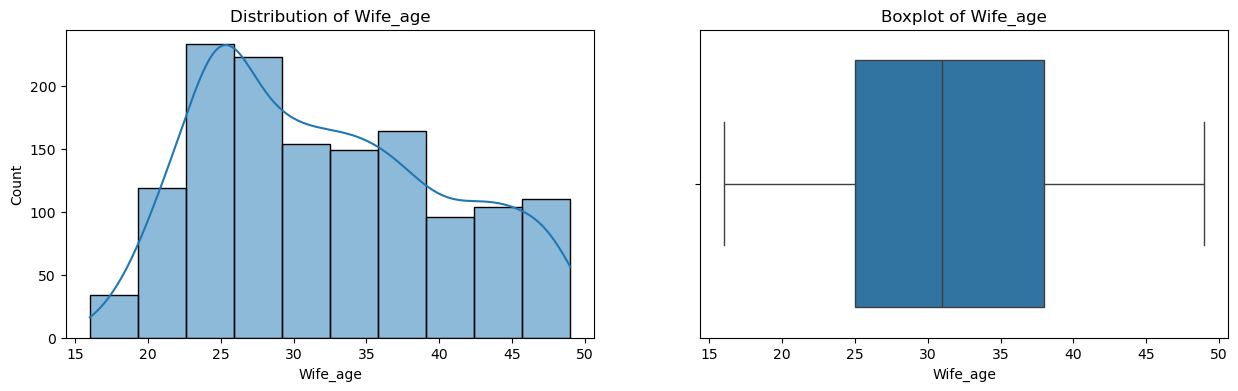

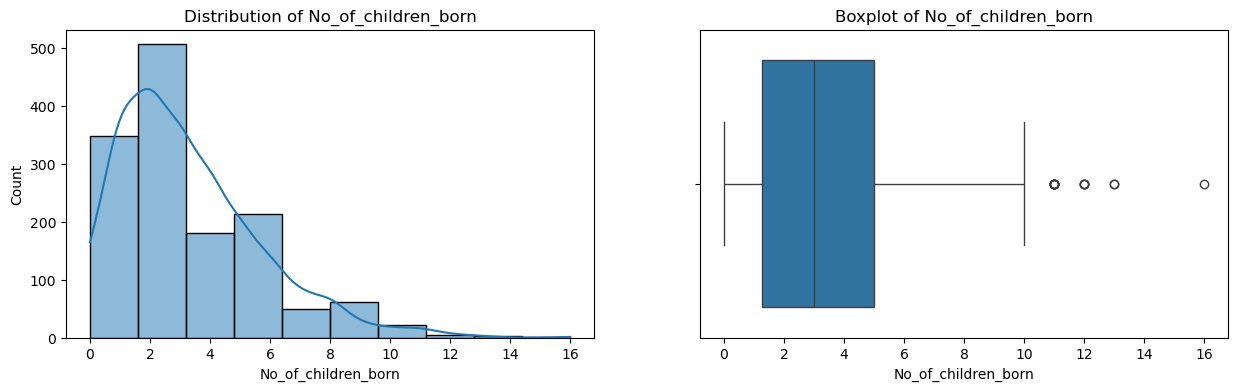

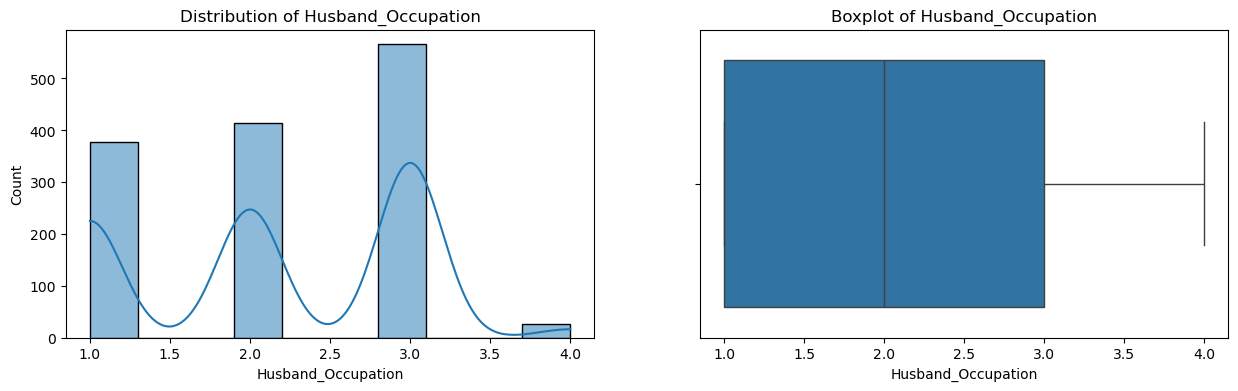

In [17]:
for col in data.select_dtypes(include=['int', 'float']).columns:
    print(col)
    print('Skew:', round(data[col].skew(), 2))
    
    # Plotting
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
plt.show()

# Bivariate Analysis

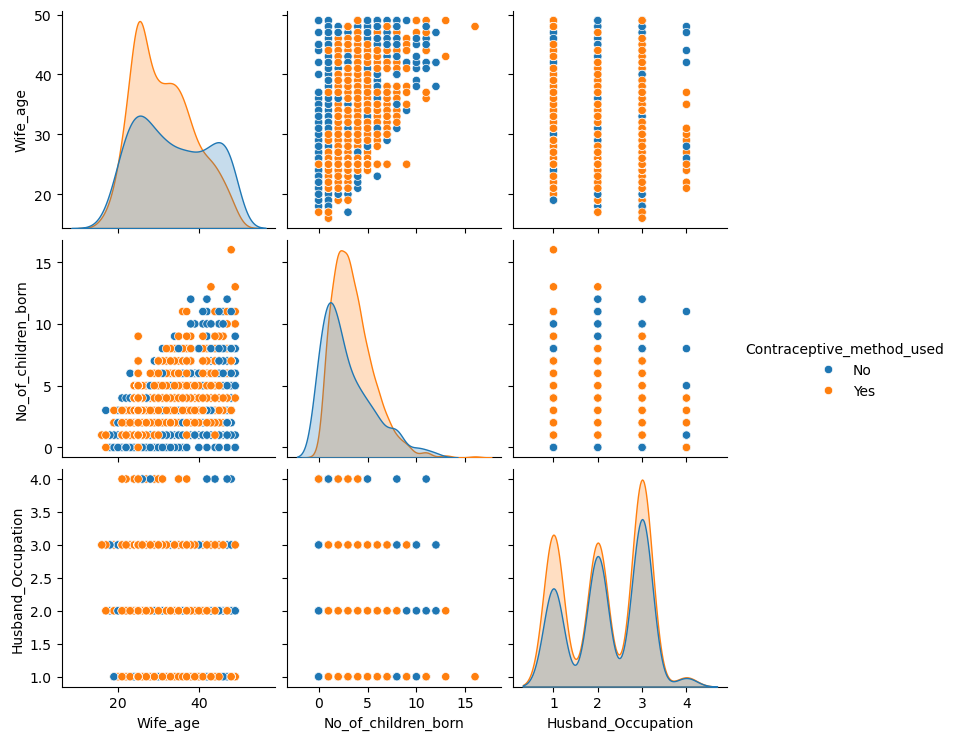

In [19]:
# Pair plot for all columns
sns.pairplot(data, diag_kind='kde', hue='Contraceptive_method_used');

We can see the outlier in no.of children_born features and let's remove the outlier

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [21]:
for column in data.columns:
    if data[column].dtype != 'object': 
            lr,ur=remove_outlier(data[column])
            data[column]=np.where(data[column]>ur,ur,data[column])
            data[column]=np.where(data[column]<lr,lr,data[column])

Proportion of outliers in Wife_age: 0.00%
Proportion of outliers in No_of_children_born: 0.00%
Proportion of outliers in Husband_Occupation: 0.00%


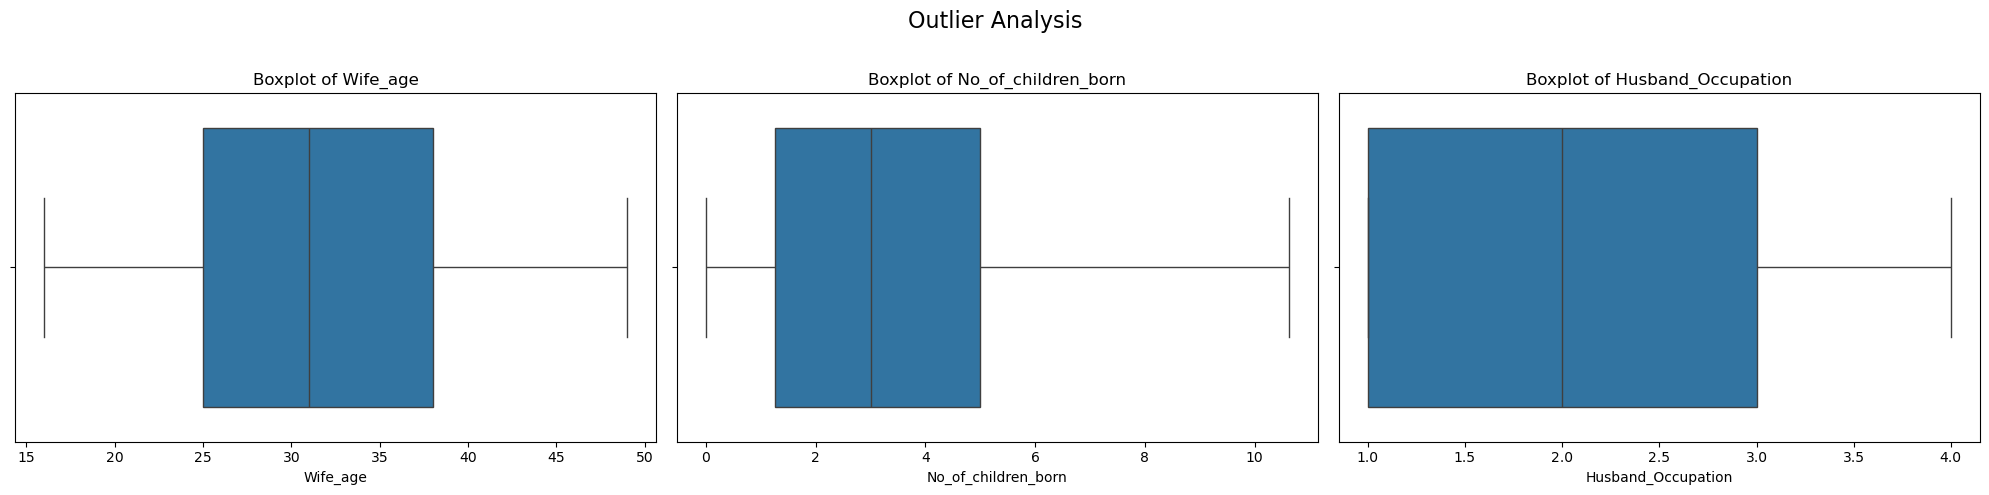

In [22]:
outlier_columns = data.select_dtypes(include=['int', 'float']).columns

# Adjust the number of rows and columns based on the number of outlier_columns
num_rows = (len(outlier_columns) - 1) // 4 + 1
num_cols = min(len(outlier_columns), 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
fig.suptitle('Outlier Analysis', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(outlier_columns):
    
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

    # Outlier detection and visualization
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    proportion_outliers = len(outliers) / len(data) * 100
    print(f"Proportion of outliers in {col}: {proportion_outliers:.2f}%")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

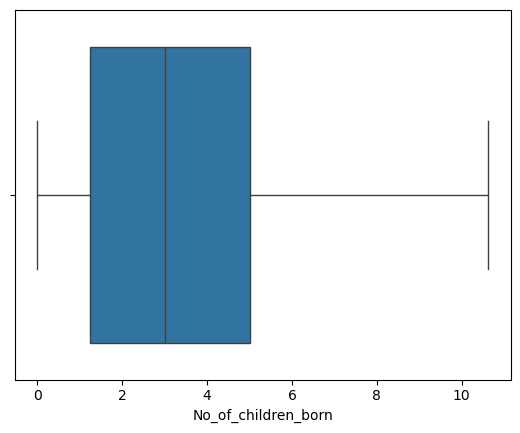

In [23]:
sns.boxplot(data=data,x='No_of_children_born');

In [25]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

Let's compare the each model

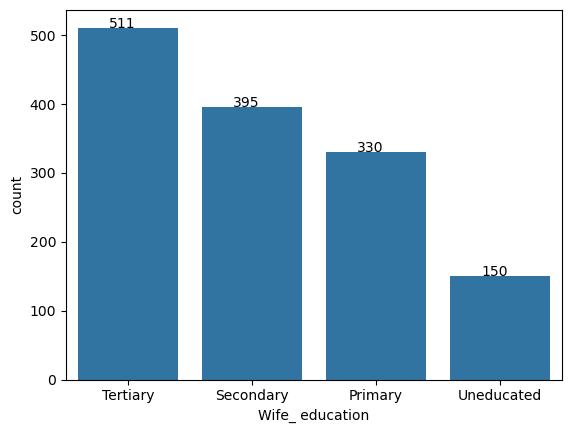

In [26]:
ax = sns.countplot(x="Wife_ education", data=data,  order = data['Wife_ education'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

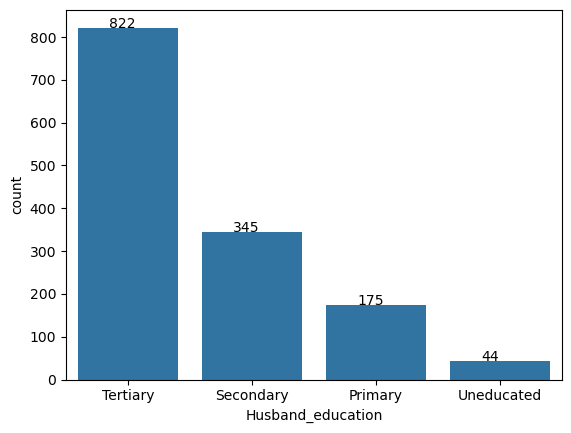

In [27]:
ax = sns.countplot(x="Husband_education", data=data,  order = data['Husband_education'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

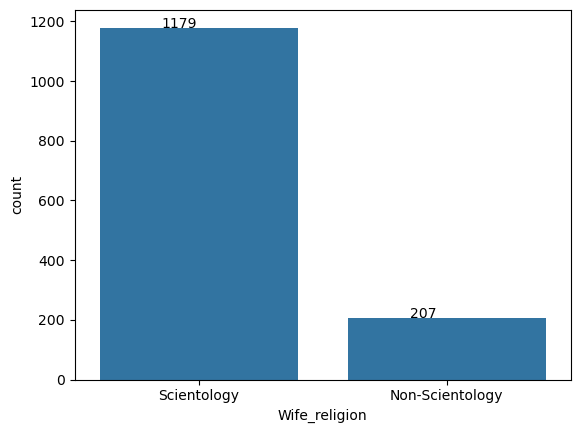

In [28]:
ax = sns.countplot(x="Wife_religion", data=data,  order = data['Wife_religion'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

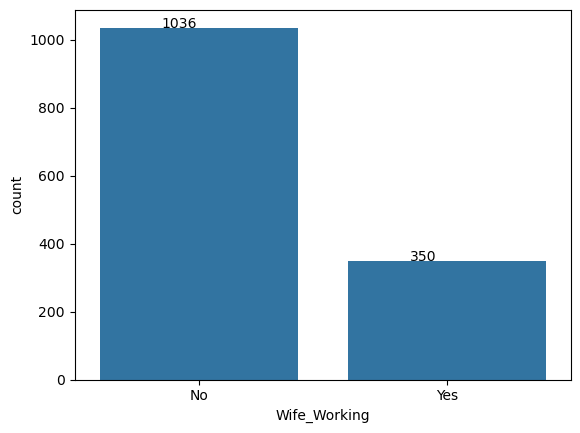

In [29]:
ax = sns.countplot(x="Wife_Working", data=data,  order = data['Wife_Working'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

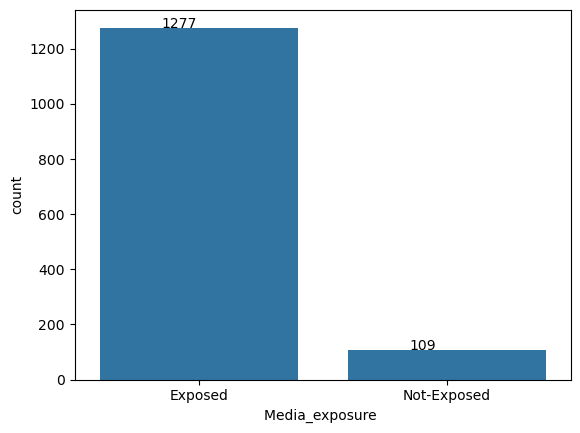

In [30]:
ax = sns.countplot(x="Media_exposure ", data=data,  order = data['Media_exposure '].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

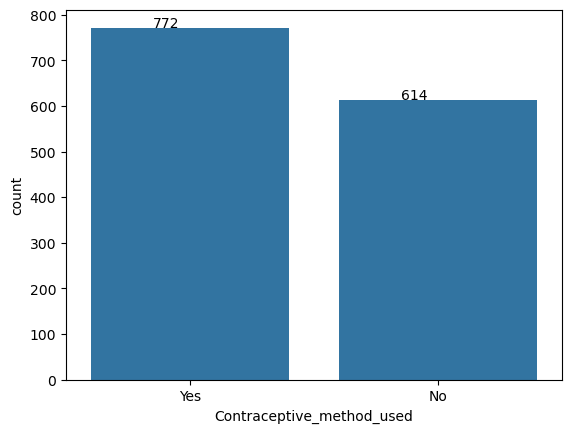

In [31]:
ax = sns.countplot(x="Contraceptive_method_used", data=data,  order = data['Contraceptive_method_used'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

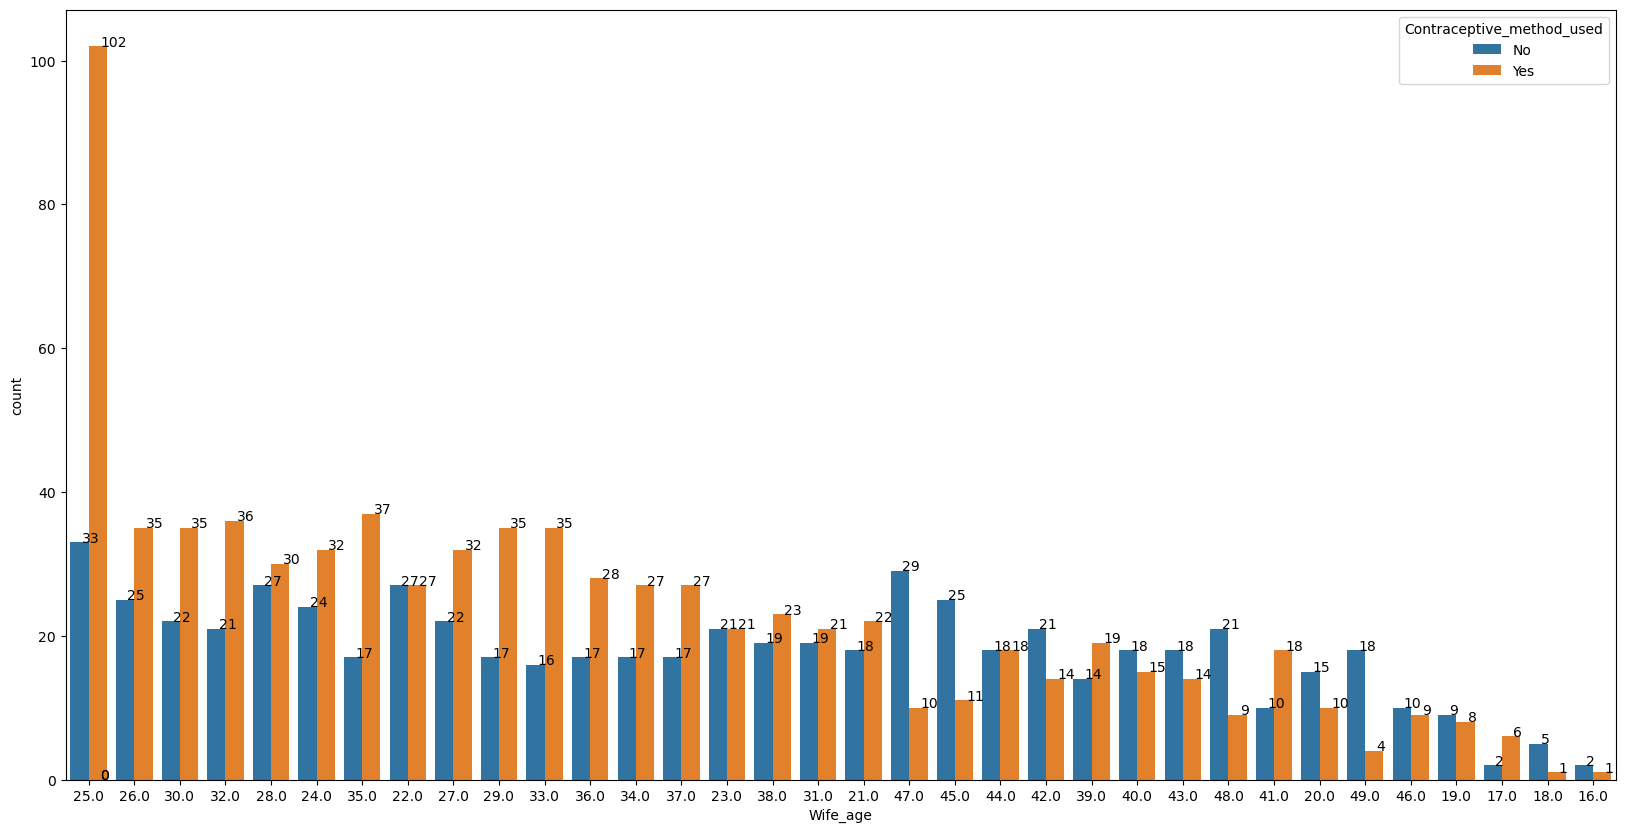

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Wife_age", data=data,hue='Contraceptive_method_used',  order = data['Wife_age'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

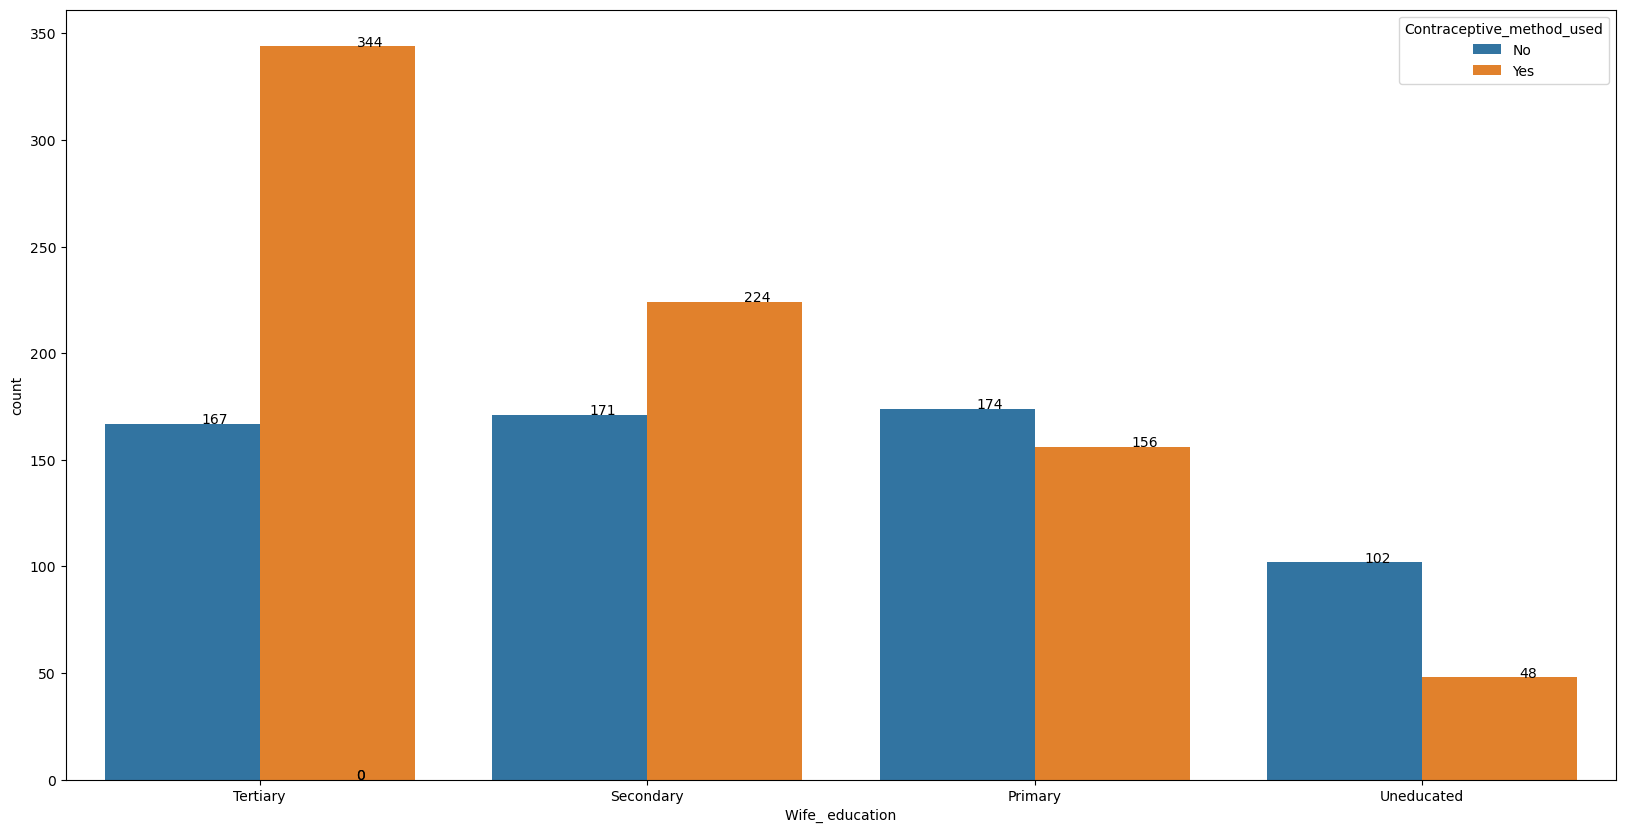

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Wife_ education", data=data,hue='Contraceptive_method_used',  order = data['Wife_ education'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

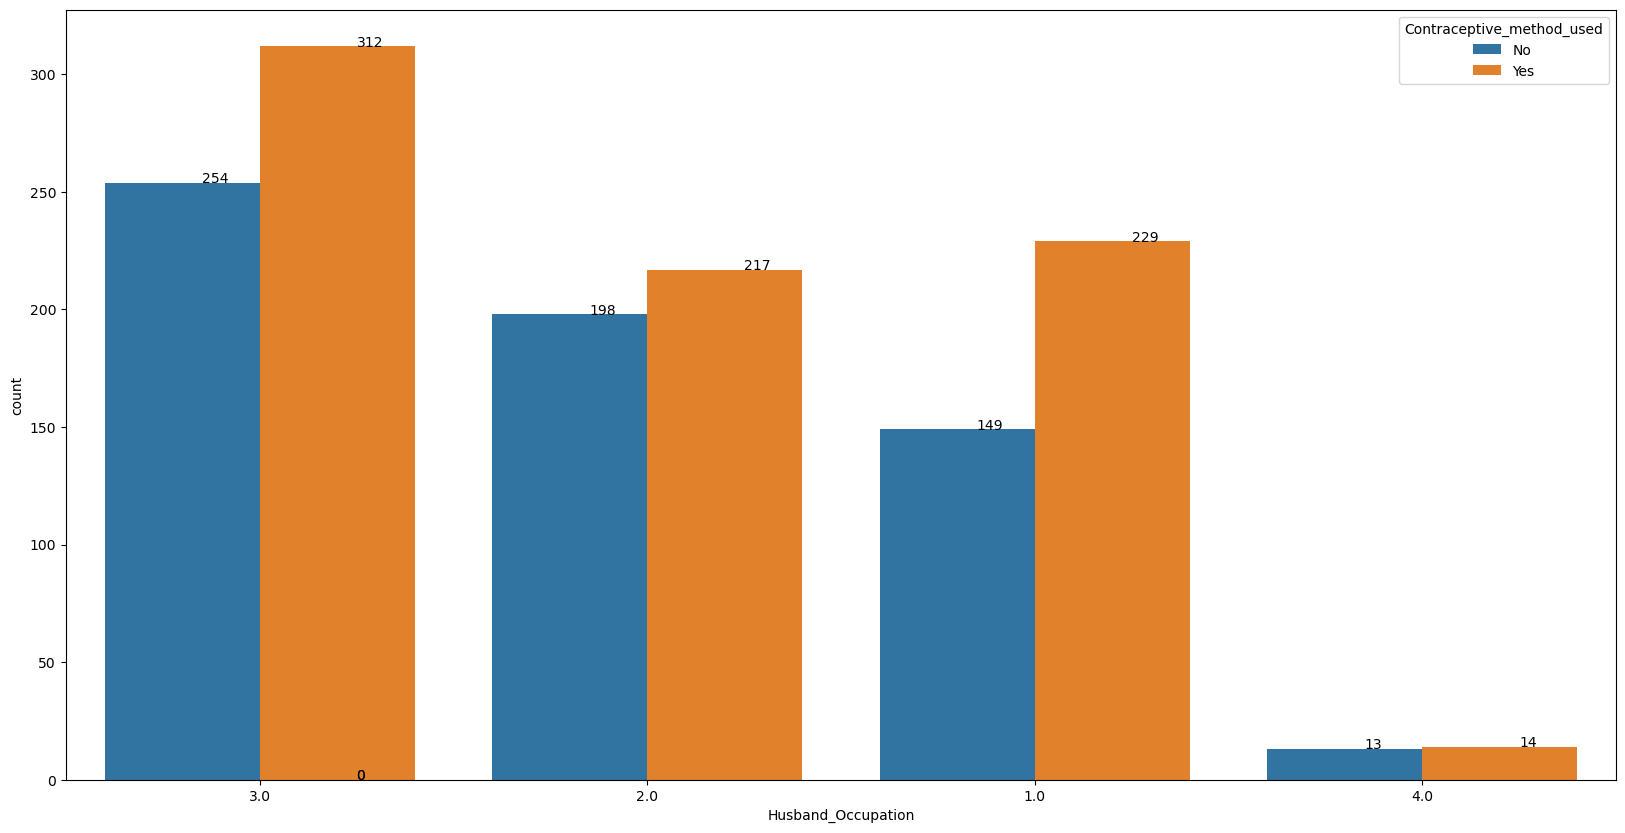

In [34]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Husband_Occupation", data=data,hue='Contraceptive_method_used',  order = data['Husband_Occupation'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

In [35]:
data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used']=='Yes','0',data['Contraceptive_method_used'])
data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used']=='No','1',data['Contraceptive_method_used'])

In [36]:
data['Contraceptive_method_used']=data['Contraceptive_method_used'].astype(int)

In [37]:
cat_cols = ['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Standard_of_living_index','Media_exposure ']

In [38]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [39]:
dummy_var=pd.get_dummies(data,drop_first=True)

In [40]:
dummy_var.head(100)

,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2.0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,45.0,10.0,3.0,1,0,0,1,1,0,0,1,0,0,1,0,0
2,43.0,7.0,3.0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,42.0,9.0,3.0,1,1,0,0,0,0,0,1,0,0,0,0,0
4,36.0,8.0,3.0,1,1,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,41.0,1.0,2.0,1,0,0,0,1,0,0,1,1,0,0,0,0
97,28.0,5.0,2.0,1,0,1,0,0,1,0,1,0,0,0,1,0
98,17.0,3.0,3.0,1,0,0,0,0,0,0,1,0,0,0,1,0
99,27.0,5.0,2.0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [41]:
data['Contraceptive_method_used'].value_counts()

0    772
1    614
Name: Contraceptive_method_used, dtype: int64

In [42]:
# Train_test_split
X=dummy_var.drop('Contraceptive_method_used',axis=1)
y=dummy_var.pop('Contraceptive_method_used')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear Discriminant Analysis

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lin_model = LinearDiscriminantAnalysis()
lin_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [45]:
y_pred_test = lin_model.predict(X_test)
y_pred_train = lin_model.predict(X_train)

In [68]:
y_pred_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
y_pred_train

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [46]:
lin_model.score(X_train,y_train)

0.6814432989690722

In [47]:
lin_model.score(X_test,y_test)

0.6730769230769231

In [48]:
#Confuson_matrix

In [49]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_test))

[[190  36]
 [100  90]]


AUC: 0.717


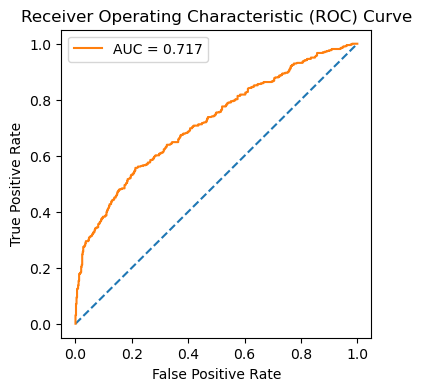

In [50]:
plt.rcParams['figure.figsize'] = (4, 4)  

# Rest of your code
probs = lin_model.predict_proba(X_train)
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr, label=f'AUC = {auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [51]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       226
           1       0.71      0.47      0.57       190

    accuracy                           0.67       416
   macro avg       0.68      0.66      0.65       416
weighted avg       0.68      0.67      0.66       416



In [52]:
train_pred_prob = lin_model.predict_proba(X_train)
test_pred_prob = lin_model.predict_proba(X_test)

In [53]:
train_pred_prob[:,1]

array([0.65796403, 0.35542605, 0.4168329 , 0.52633728, 0.51738299,
       0.21478622, 0.21115264, 0.63843585, 0.15183421, 0.52837356,
       0.31620663, 0.60214607, 0.07494471, 0.21562075, 0.21822359,
       0.57295317, 0.94146176, 0.4876936 , 0.5141921 , 0.40645339,
       0.77293724, 0.67483578, 0.96115787, 0.19893879, 0.38079249,
       0.22448896, 0.51113393, 0.3340414 , 0.2758571 , 0.61132413,
       0.11121588, 0.20897428, 0.23508597, 0.80875928, 0.50164835,
       0.23037867, 0.41297825, 0.42423603, 0.23988046, 0.32003938,
       0.57403175, 0.41025156, 0.24840278, 0.57475048, 0.66145885,
       0.19059998, 0.62187381, 0.51877911, 0.38415407, 0.2552438 ,
       0.4785479 , 0.4694077 , 0.76287819, 0.36841376, 0.65799098,
       0.41517327, 0.38148704, 0.51725248, 0.60073113, 0.25661918,
       0.31782338, 0.16281087, 0.49474507, 0.45714929, 0.28876287,
       0.47780782, 0.74493081, 0.40414932, 0.64702007, 0.34375413,
       0.38825946, 0.69509638, 0.23891811, 0.18134951, 0.19788

In [54]:
lin_model.intercept_

array([-1.75665226])

In [55]:
lin_model.coef_

array([[ 0.08350443, -0.33829562, -0.1118173 , -0.36278036, -1.03886444,
         0.43699543, -0.27252976,  0.04118209,  0.17559145,  0.61527271,
         0.09846782,  0.28436056, -0.21947758,  0.7201661 ,  0.15928935]])

In [56]:
round_a =lin_model.coef_
np.round(round_a,2)

array([[ 0.08, -0.34, -0.11, -0.36, -1.04,  0.44, -0.27,  0.04,  0.18,
         0.62,  0.1 ,  0.28, -0.22,  0.72,  0.16]])

In [57]:
lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, y_train)
X_test_lda = lda_model.transform(X_test)

In [58]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(970, 1)
(416, 1)


In [59]:
lda_model.coef_

array([[ 0.08350443, -0.33829562, -0.1118173 , -0.36278036, -1.03886444,
         0.43699543, -0.27252976,  0.04118209,  0.17559145,  0.61527271,
         0.09846782,  0.28436056, -0.21947758,  0.7201661 ,  0.15928935]])

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression(max_iter=1000)
logis_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
logis_model.score(X_train,y_train)

0.6855670103092784

In [62]:
logis_model.score(X_test,y_test)

0.6754807692307693

In [63]:
y_test_pred = logis_model.predict(X_test)
y_pred_train = logis_model.predict(X_train)

In [64]:
y_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
y_pred_train

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [70]:
#Classification Report

In [71]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_test))

[[190  36]
 [100  90]]


# Classification Report

In [66]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       226
           1       0.72      0.48      0.57       190

    accuracy                           0.68       416
   macro avg       0.69      0.66      0.66       416
weighted avg       0.68      0.68      0.66       416



# ROC-AUC Curve

AUC: 0.718


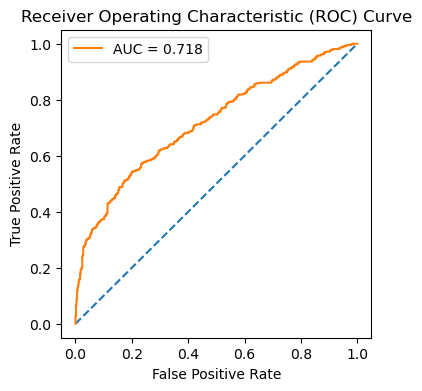

In [67]:
plt.rcParams['figure.figsize'] = (4, 4)  

# Rest of your code
probs = logis_model.predict_proba(X_train)
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr, label=f'AUC = {auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()